In [1]:
import numpy as np
import pandas as pd,seaborn as sns
import matplotlib.pyplot as plt

In [51]:
data=pd.read_csv(r'C:\Users\Bhaskar\glass.csv')

In [52]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [53]:
data.drop(['Type'],axis=1,inplace=True)

In [54]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [55]:
data['ID']=data.index+100

In [56]:
list(enumerate(data.columns[:-1]))

[(0, 'RI'),
 (1, 'Na'),
 (2, 'Mg'),
 (3, 'Al'),
 (4, 'Si'),
 (5, 'K'),
 (6, 'Ca'),
 (7, 'Ba'),
 (8, 'Fe')]

In [57]:
f=data.columns[:-1]

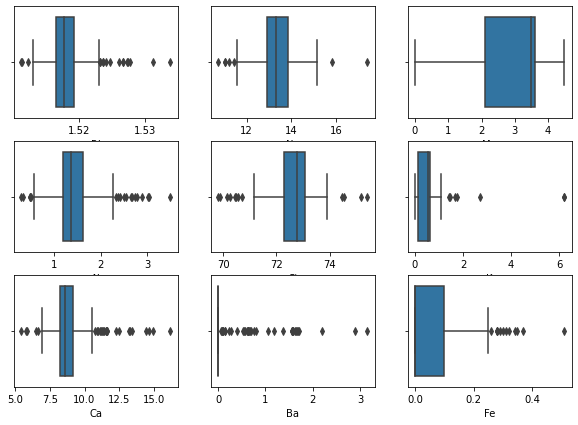

In [58]:
plt.figure(figsize=(10,7))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=data,x=i[1])

In [59]:
for i in f:
    q1=data[i].quantile(0.01)
    q3=data[i].quantile(0.99)
    data[i][data[i]<q1]=q1
    data[i][data[i]>q3]=q3

<ipython-input-59-eaaa2351f9cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]<q1]=q1
<ipython-input-59-eaaa2351f9cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]>q3]=q3
<ipython-input-59-eaaa2351f9cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]<q1]=q1
<ipython-input-59-eaaa2351f9cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



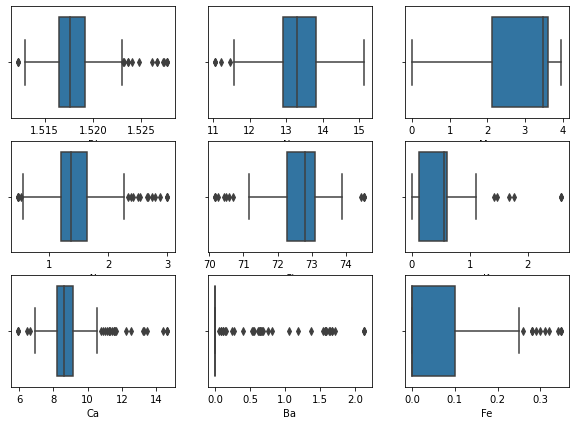

In [60]:
plt.figure(figsize=(10,7))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=data,x=i[1])

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler=StandardScaler()

In [63]:
ddsc=scaler.fit_transform(data.drop(['ID'],axis=1))

In [64]:
data_01=pd.DataFrame(ddsc)

In [65]:
data_01.head()

,0,1,2,3,4,5,6,7,8
0,0.950549,0.319899,0.893132,-0.707909,-1.170586,-1.021903,-0.147013,-0.367626,-0.597741
1,-0.255286,0.647661,0.639148,-0.172494,0.112257,0.044327,-0.817870,-0.367626,-0.597741
2,-0.762446,0.175684,0.604337,0.198179,0.463350,-0.184151,-0.854329,-0.367626,-0.597741
3,-0.237553,-0.243851,0.701809,-0.316644,-0.049787,0.272804,-0.533485,-0.367626,-0.597741
4,-0.322671,-0.165188,0.653073,-0.419608,0.584883,0.222032,-0.642864,-0.367626,-0.597741


In [66]:
data_01.columns=data.columns[:-1]

In [67]:
data_01.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.950549,0.319899,0.893132,-0.707909,-1.170586,-1.021903,-0.147013,-0.367626,-0.597741
1,-0.255286,0.647661,0.639148,-0.172494,0.112257,0.044327,-0.817870,-0.367626,-0.597741
2,-0.762446,0.175684,0.604337,0.198179,0.463350,-0.184151,-0.854329,-0.367626,-0.597741
3,-0.237553,-0.243851,0.701809,-0.316644,-0.049787,0.272804,-0.533485,-0.367626,-0.597741
4,-0.322671,-0.165188,0.653073,-0.419608,0.584883,0.222032,-0.642864,-0.367626,-0.597741


In [68]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [69]:
def hop(x):
    d=x.shape[1]
    n=len(x)
    m=int(0.01*n)
    nbrs=NearestNeighbors(n_neighbors=1).fit(x.values)
    x_rand=sample(range(0,n,1),m)
    ujd=[]
    uwd=[]
    for j in range(0,m):
        u_dot,_=nbrs.kneighbors(uniform(np.amin(x,axis=0),np.amax(x,axis=0),d).reshape(1,-1),2,return_distance=True)
        ujd.append(u_dot[0][1])
        w_dot,_=nbrs.kneighbors(x.iloc[x_rand[j]].values.reshape(1,-1),2,return_distance=True)
        uwd.append(w_dot[0][1])
        
        H=sum(ujd)/(sum(ujd)+sum(uwd))
    if isnan(H):
        print(ujd,uwd)
        H=0
    return H
        

In [70]:
hop(data_01)


0.7733187615037754

In [71]:
def hop_01(x):
    d=x.shape[1]
    n=len(x)
    m=int(0.01*n)
    nbrs=NearestNeighbors(n_neighbors=1).fit(x.values)
    x_rand=sample(range(0,n,1),m)
    
    ujd=[]
    wjd=[]
    for j in range(0,m):
        u_dot,_=nbrs.kneighbors(uniform(np.amin(x,axis=0),np.amax(x,axis=0),d).reshape(1,-1),2,return_distance=True)
        ujd.append(u_dot[0][1])
        w_dot,_=nbrs.kneighbors(x.iloc[x_rand[j]].values.reshape(1,-1),2,return_distance=True)
        wjd.append(w_dot[0][1])
        
        H=sum(ujd)/(sum(ujd)+sum(wjd))
    if isnan(H):
            print(ujd,wjd)
            H=0
    return H
        
     
    

In [72]:
hop_01(data_01)

0.8518406948504574

In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [74]:
still=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,random_state=42).fit(data_01)
    still.append([k,silhouette_score(data_01,kmean.labels_)])

In [75]:
kmean.labels_

array([3, 4, 4, 4, 0, 6, 0, 0, 4, 0, 6, 0, 6, 6, 0, 0, 0, 3, 4, 0, 6, 3,
       0, 0, 4, 0, 4, 0, 0, 0, 6, 0, 6, 0, 0, 0, 4, 0, 3, 3, 0, 0, 0, 3,
       6, 4, 6, 3, 3, 4, 3, 4, 4, 0, 4, 6, 6, 0, 4, 4, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 6, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 4,
       0, 0, 6, 0, 6, 0, 0, 4, 6, 6, 0, 0, 6, 0, 6, 3, 3, 5, 5, 5, 8, 8,
       5, 5, 5, 6, 4, 4, 4, 4, 6, 4, 4, 6, 0, 4, 4, 6, 0, 3, 6, 8, 8, 5,
       4, 4, 4, 6, 6, 0, 0, 0, 4, 6, 6, 0, 6, 6, 4, 4, 4, 0, 6, 3, 4, 4,
       0, 0, 4, 3, 4, 4, 4, 6, 3, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 8, 6, 8,
       4, 4, 4, 4, 1, 1, 8, 8, 1, 7, 7, 3, 3, 3, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 1, 2, 2, 7, 1, 1, 2, 2, 2, 2])

In [76]:
kill_me=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,random_state=0).fit(data_01)
    kill_me.append([k,silhouette_score(data_01,kmean.labels_)])

In [77]:
still=pd.DataFrame(still)

In [78]:
still

,0,1
0,2,0.405822
1,3,0.361374
2,4,0.339747
3,5,0.354464
4,6,0.332321
5,7,0.344709
6,8,0.352891
7,9,0.346132
8,10,0.240641


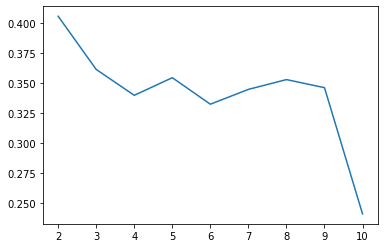

In [79]:
plt.plot(still[0],still[1])

In [80]:
kmean.inertia_

554.6025266945353

In [81]:
das=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,random_state=0).fit(data_01)
    das.append([k,kmean.inertia_])

In [82]:
das

[[2, 1512.8117159614562],
 [3, 1183.2543719998419],
 [4, 1016.1784938589905],
 [5, 859.2219496158458],
 [6, 740.5000882436852],
 [7, 669.2995736944393],
 [8, 628.0365301638982],
 [9, 590.0984764640407],
 [10, 554.6025266945353]]

In [83]:
das=pd.DataFrame(das)

In [84]:
das

,0,1
0,2,1512.811716
1,3,1183.254372
2,4,1016.178494
3,5,859.221950
4,6,740.500088
5,7,669.299574
6,8,628.036530
7,9,590.098476
8,10,554.602527


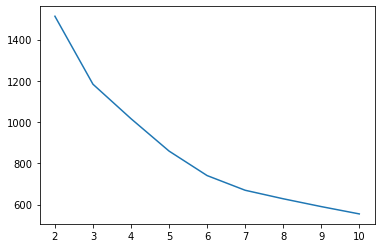

In [85]:
plt.plot(das[0],das[1])

In [86]:
kmean=KMeans(n_clusters=2,random_state=0)

In [87]:
kmean.fit(data_01)

KMeans(n_clusters=2, random_state=0)

In [88]:
kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
data['Label']=kmean.labels_

In [91]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,Label
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.0,0.0,100,1
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.0,0.0,101,1
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.0,0.0,102,1
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.0,0.0,103,1
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.0,0.0,104,1
